예제 4.1 다층 신경망 분류기(XOR 연산)

In [ ]:
# 예제 4.1 다층 퍼셉트론 분류기(XOR 연산)

# 셋업
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])   # 학습 데이터
y_train = np.array([[0], [1], [1], [0]])               # 레이블(정답)

# 모델 생성
model = Sequential([
    Dense(2, activation='sigmoid',                   # 은닉층 뉴런 2개
          kernel_initializer=RandomNormal(seed=7),   # 가중치 초기화
          input_shape=(2, ), name='Hidden_Layer'),
    Dense(1,                                         # 출력층 뉴런 1개
          kernel_initializer=RandomNormal(seed=7),
          activation='sigmoid',                      # sigmoid 함수 사용
          name='Output_Layer')
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=10000, verbose=0)

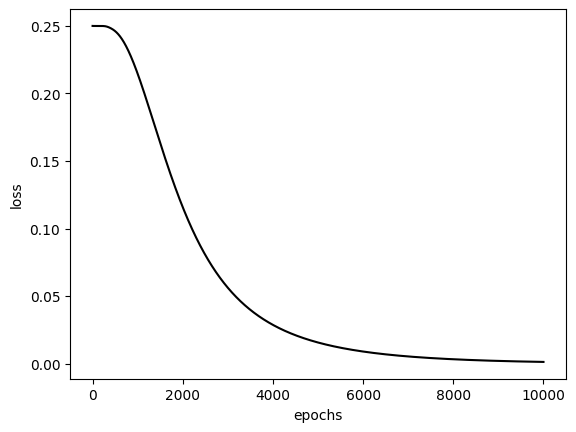

In [ ]:
# 학습 결과 시각화
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], color='black')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
# 학습 후 은닉층 가중치와 바이어스 확인
weights, biases = model.layers[0].get_weights()

print(f"weights: {weights.round(1)} \n bias: {biases.round(1)}")

weights: [[-6.7 -5.1]
 [-6.8 -5.1]] 
 bias: [3.1 7.7]


In [ ]:
# 학습 후 출력층 가중치와 바이어스 확인
weights, bias = model.layers[1].get_weights()

print(f"weights: {weights.round(1)} \n bias: {bias.round(1)}")

weights: [[-7.6]
 [ 8. ]] 
 bias: [-4.]


In [ ]:
# 모델 예측
x_test = np.array([[0, 0],[0, 1], [1, 0], [1, 1]])   # 테스트 데이터
y_test = np.array([[0], [1], [1], [0]])              # 테스트 정답

model.predict(x_test).round(2)

1/1 [==============================] - 0s 17ms/step


array([[0.04],
       [0.96],
       [0.96],
       [0.03]], dtype=float32)